In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
sess = tf.InteractiveSession()

In [2]:
! wget http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2016-11-19 22:00:12--  http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu... 128.195.10.249
Connecting to archive.ics.uci.edu|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [text/plain]
Saving to: 'iris.data.5'

iris.data.5         100%[=====================>]   4.44K  --.-KB/s   in 0s     

2016-11-19 22:00:12 (15.7 MB/s) - 'iris.data.5' saved [4551/4551]



In [2]:
iris = pd.read_csv('iris.data', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
n_samples = iris.shape[0]

In [4]:
x_1 = iris.sepal_width.values.reshape((n_samples, 1))
x_2 = iris.sepal_length.values.reshape((n_samples, 1))
train_X = np.hstack([np.ones_like(x_1), x_1, x_2])

In [5]:
# Iris-setosa versus the other species
targets = 1.0 * (iris.species.values == 'Iris-setosa')
train_Y = targets.reshape(n_samples, 1)

In [6]:
train_X[:10,]

array([[ 1. ,  3.5,  5.1],
       [ 1. ,  3. ,  4.9],
       [ 1. ,  3.2,  4.7],
       [ 1. ,  3.1,  4.6],
       [ 1. ,  3.6,  5. ],
       [ 1. ,  3.9,  5.4],
       [ 1. ,  3.4,  4.6],
       [ 1. ,  3.4,  5. ],
       [ 1. ,  2.9,  4.4],
       [ 1. ,  3.1,  4.9]])

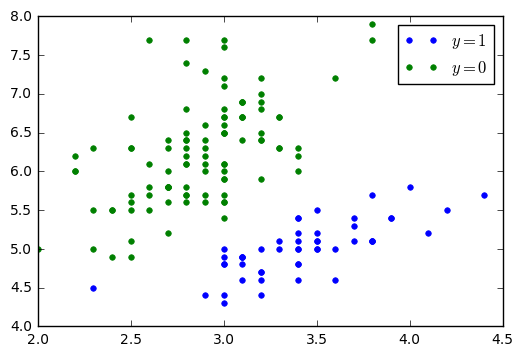

In [7]:
def fitted_line(w, neutral=0, **plot_args):
    w_0, w_1, w_2 = w
    x_0, x_1 = plt.xlim()
    y_0, y_1 = (neutral - w_0 - w_1 * np.array([x_0, x_1])) / w_2
    plt.plot([x_0, x_1], [y_0, y_1], **plot_args)
    
def plot_result(predicted_probs=None):
    x_1, x_2 = train_X[:,1,np.newaxis], train_X[:,2,np.newaxis]

    if predicted_probs is not None:
        plt.plot(x_1[predicted_probs > .5], x_2[predicted_probs > .5], 'ob', ms=8, alpha=.3, mec='blue', label='$\hat{y} = 1$');
        plt.plot(x_1[predicted_probs <= .5], x_2[predicted_probs <= .5], 'og', ms=8, alpha=.3, mec='green', label='$\hat{y} = 0$');
    plt.plot(x_1[targets == 1], x_2[targets == 1], 'ob', ms=4, mec='blue', label='$y = 1$');
    plt.plot(x_1[targets == 0], x_2[targets == 0], 'og', ms=4, mec='green', label='$y = 0$');
    plt.legend()
    
plot_result()

## Linear model

$$ \underbrace{\mathbf{y}}_{n \times 1} = \underbrace{\mathbf{X}}_{n \times d} \cdot \underbrace{\mathbf{w}}_{d \times 1} $$

In [11]:
# number of input features + 1 constant term
D = 3
X = tf.placeholder("float", shape = [None, D])
Y = tf.placeholder("float", shape = [None, 1])

W = tf.Variable(tf.zeros(shape=(D, 1)))
sess.run(W.initializer)

probabilities = tf.matmul(X, W)

# Mean squared error
cost = tf.reduce_mean(tf.pow(probabilities-Y, 2))

Epoch:    0, cost=0.3333 W=[ 0.00333333  0.01139333  0.01668666]
Epoch:  100, cost=0.1504 W=[ 0.03524246  0.2074116  -0.06162098]
Epoch:  200, cost=0.1030 W=[ 0.05720817  0.34025645 -0.13390552]
Epoch:  300, cost=0.0784 W=[ 0.07464772  0.43570635 -0.18612184]
Epoch:  400, cost=0.0656 W=[ 0.08881249  0.50421506 -0.22387765]
Epoch:  500, cost=0.0589 W=[ 0.10060418  0.55331498 -0.25121364]
Epoch:  600, cost=0.0554 W=[ 0.11067257  0.58843291 -0.27104089]
Epoch:  700, cost=0.0535 W=[ 0.11948594  0.6134789  -0.28545693]
Epoch:  800, cost=0.0525 W=[ 0.1273818   0.63127041 -0.29597312]
Epoch:  900, cost=0.0520 W=[ 0.13460359  0.64383703 -0.30367836]


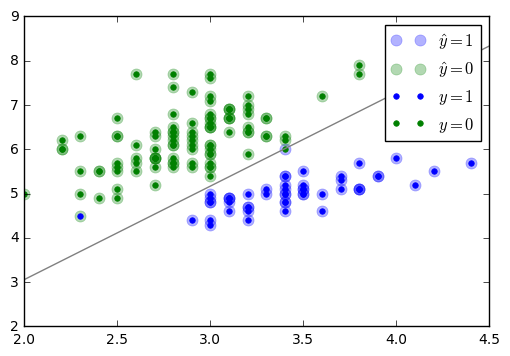

In [12]:
# Parameters
learning_rate = 0.005
n_epochs = 1000
display_step = 100

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
init = tf.initialize_all_variables()

# storing weights for each epochs for later visualisation
fitted_ws = np.zeros((n_epochs, D))

for epoch in range(n_epochs):
    # feeding the full training set for every epoch
    _, fitted_w, cost_value, predicted_probs = sess.run([optimizer, W, cost, probabilities], feed_dict={X: train_X, Y: train_Y})
    
    fitted_ws[epoch, :] = fitted_w.ravel()

    if (epoch) % display_step == 0:
        print("Epoch: {:4d}, cost={:.4f} W={}".format(epoch, cost_value, fitted_w.ravel()))
        
plot_result(predicted_probs)
fitted_line(fitted_ws[-1,:], neutral=0.5, color='grey')
plt.ylim([2, 9]);

### Introducing a single outlier point

Epoch:    0, cost=0.1779 W=[ 1.04226387  0.1649387  -0.21110263]
Epoch:  100, cost=0.1406 W=[ 1.07634497  0.07520622 -0.17045505]
Epoch:  200, cost=0.1390 W=[ 1.10388505  0.0707675  -0.1727237 ]
Epoch:  300, cost=0.1375 W=[ 1.13063455  0.07027615 -0.17696561]
Epoch:  400, cost=0.1361 W=[ 1.15687907  0.06997376 -0.1812233 ]
Epoch:  500, cost=0.1347 W=[ 1.18264031  0.06968531 -0.18540707]
Epoch:  600, cost=0.1334 W=[ 1.20792747  0.06940258 -0.18951409]
Epoch:  700, cost=0.1322 W=[ 1.23274958  0.06912503 -0.19354554]
Epoch:  800, cost=0.1309 W=[ 1.25711489  0.06885263 -0.19750284]
Epoch:  900, cost=0.1298 W=[ 1.28103197  0.06858523 -0.20138732]


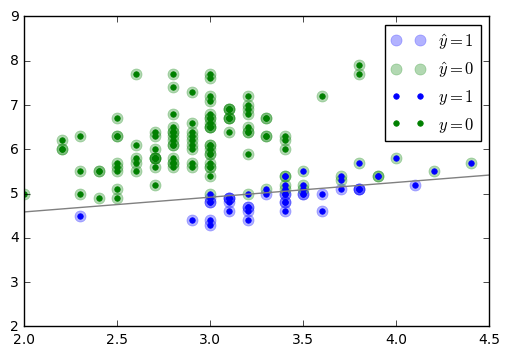

In [16]:
train_Y[train_X[:,0].argmax()] = 0
train_X[train_X[:,0].argmax(), 1] = -20

# storing weights for each epochs for later visualisation
fitted_ws = np.zeros((n_epochs, D))

for epoch in range(n_epochs):
    # feeding the full training set for every epoch
    _, fitted_w, cost_value, predicted_probs = sess.run([optimizer, W, cost, probabilities], feed_dict={X: train_X, Y: train_Y})
    
    fitted_ws[epoch, :] = fitted_w.ravel()

    if (epoch) % display_step == 0:
        print("Epoch: {:4d}, cost={:.4f} W={}".format(epoch, cost_value, fitted_w.ravel()))
        
    
plot_result(predicted_probs)
fitted_line(fitted_ws[-1,:], neutral=0.5, color='grey')
plt.xlim([2, 4.5]); plt.ylim([2, 9]);

## Logistic regression

$$ \underbrace{\mathbf{y}}_{n \times 1} = \sigma(\underbrace{\mathbf{X}}_{n \times d} \cdot \underbrace{\mathbf{w}}_{d \times 1}) $$

In [42]:
D = 3
X = tf.placeholder("float", shape = [None, D])
Y = tf.placeholder("float", shape = [None, 1])

W = tf.Variable(tf.zeros(shape=(D, 1)))
sess.run(W.initializer)

logits = tf.matmul(X, W)
probabilities = tf.sigmoid(logits)
logistic_loss = -tf.reduce_mean(Y * tf.log(probabilities) + (1 - Y) * tf.log(1 - probabilities))

In [43]:
# Parameters
learning_rate = .2
n_epochs = 100
display_step = 10

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(logistic_loss)
init = tf.initialize_all_variables()

fitted_ws = np.zeros((n_epochs, D))

for epoch in range(n_epochs):

    _, fitted_w, loss_value, predicted_probs = sess.run(
        fetches=[optimizer, W, logistic_loss, probabilities],
        feed_dict={X: train_X, Y: train_Y})
    fitted_ws[epoch, :] = fitted_w.ravel()
    if (epoch) % display_step == 0:
        print("Epoch: {:4d}, cost={:.4f} W={}".format(epoch, loss_value, fitted_w.ravel()))

Epoch:    0, cost=0.6931 W=[-0.03466665 -0.06653333 -0.25740004]
Epoch:   10, cost=0.5109 W=[ 0.03027367  0.37457442 -0.35989568]
Epoch:   20, cost=0.4411 W=[ 0.0743996   0.69861394 -0.52555591]
Epoch:   30, cost=0.3885 W=[ 0.11213557  0.97712672 -0.68100309]
Epoch:   40, cost=0.3473 W=[ 0.14597815  1.22238624 -0.82029593]
Epoch:   50, cost=0.3146 W=[ 0.17679337  1.4409318  -0.94538331]
Epoch:   60, cost=0.2880 W=[ 0.20512831  1.63756728 -1.05860341]
Epoch:   70, cost=0.2661 W=[ 0.23139966  1.81604242 -1.1618675 ]
Epoch:   80, cost=0.2478 W=[ 0.2559309   1.97929704 -1.25670886]
Epoch:   90, cost=0.2322 W=[ 0.27897698  2.12965465 -1.34436047]


(2, 9)

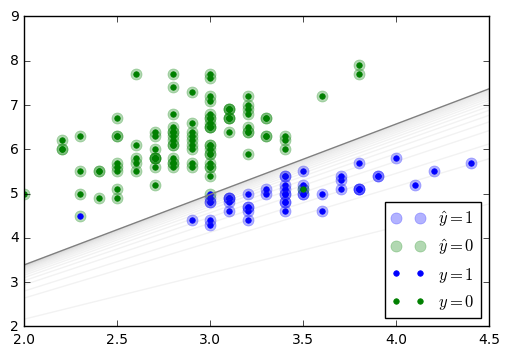

In [44]:
plt.plot(x_1[predicted_probs > .5], x_2[predicted_probs > .5], 'ob', ms=8, alpha=.3, mec='blue', label='$\hat{y} = 1$');
plt.plot(x_1[predicted_probs <= .5], x_2[predicted_probs <= .5], 'og', ms=8, alpha=.3, mec='green', label='$\hat{y} = 0$');
plt.plot(x_1[targets == 1], x_2[targets == 1], 'ob', ms=4, mec='blue', label='$y = 1$');
plt.plot(x_1[targets == 0], x_2[targets == 0], 'og', ms=4, mec='green', label='$y = 0$');

plt.legend(loc=4)
fitted_line(fitted_ws[-1,:], color='grey')

[fitted_line(w, color='grey', alpha=0.1)
 for w in fitted_ws[10:n_epochs:5, :]];
plt.ylim([2, 9])